<a href="https://colab.research.google.com/github/TChauFlamingHeart/cecs105/blob/main/Copy_of_final_project_456test1CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thong's versin
using convoluted neural network

#Setup for Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

import zipfile

import shutil
import random


#Load the dataset from Kaggle


In [ ]:
!pip install kaggle #install kaggle


from google.colab import files #Upload Kaggle API Key
# files.upload()  #Upload the kaggle.json file


# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

#this retrieves the dataset from the user
!kaggle datasets download -d alessiocorrado99/animals10
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

#Dissecting the dataset to smaller sets
first, we will normalize and augment the data


In [ ]:
# Set the path to the dataset
data_dir = "/content/raw-img"
test_dir = "/content/test-img"

# Create the test directory structure
os.makedirs(test_dir, exist_ok=True)

# Iterate through each class folder and copy 10% of images to the test folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    test_class_path = os.path.join(test_dir, class_name)
    os.makedirs(test_class_path, exist_ok=True)

    # List all images in the current class folder
    images = os.listdir(class_path)
    random.shuffle(images)

    # Take 10% of the images
    test_images = images[:int(0.1 * len(images))]

    # Move images to the test directory
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_class_path, img)
        shutil.move(src, dst)


next we will create generators to get the images.

In [ ]:

# ImageDataGenerator with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split 20% for validation
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Test Generator
test_datagen = ImageDataGenerator(rescale=1./255)


# Train dataset
train_dataset = train_datagen.flow_from_directory(
    directory="/content/raw-img",  # Remaining data in raw-img
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse",
    subset="training",
    shuffle=True
)

# Validation dataset
valid_dataset = train_datagen.flow_from_directory(
    directory="/content/raw-img",  # Remaining data in raw-img
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse",
    subset="validation",
    shuffle=True
)

test_dataset = test_datagen.flow_from_directory(
    directory="/content/test-img",
    target_size=(128, 128),
    batch_size=32,
    class_mode="sparse",
    shuffle=False
)

# Check the datasets
print(f"Train dataset samples: {train_dataset.samples}")
print(f"Validation dataset samples: {valid_dataset.samples}")

# For the test set, put 10% of your images into a separate folder (e.g., test-img)




Found 18856 images belonging to 10 classes.
Found 4709 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.
Train dataset samples: 18856
Validation dataset samples: 4709


#Building the neural network model

going to use a CNN model.



In [ ]:
cnn = tf.keras.models.Sequential() #initializing the CNN

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation="relu", padding = "same", input_shape=[128,128,3])) #Convolution 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=3)) #Pooling 1

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")) #Convolution 2
# cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=3)) #Pooling 2

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #Convolution 3
# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=3)) #Pooling 3

# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=3)) #Pooling 4

cnn.add(tf.keras.layers.Flatten()) #Flaterning


cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=32, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [ ]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 42, 42, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 42, 42, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,634 (900.91 KB)

 Trainable params: 230,634 (900.91 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model


In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#Training the Convoluted Neural Network we built

In [ ]:
history = cnn.fit(
    train_dataset,
    validation_data = valid_dataset,
    batch_size=32,
    epochs=5,
    #steps_per_epoch=len(train_dataset)//32,
    #validation_steps=len(valid_dataset)//32
)


Epoch 1/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 144s 242ms/step - accuracy: 0.4711 - loss: 1.5377 - val_accuracy: 0.5131 - val_loss: 1.4121
Epoch 2/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 183s 210ms/step - accuracy: 0.5071 - loss: 1.4430 - val_accuracy: 0.5383 - val_loss: 1.3608
Epoch 3/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 141s 210ms/step - accuracy: 0.5229 - loss: 1.3935 - val_accuracy: 0.5345 - val_loss: 1.3634
Epoch 4/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 125s 211ms/step - accuracy: 0.5455 - loss: 1.3248 - val_accuracy: 0.5515 - val_loss: 1.3028
Epoch 5/5
590/590 ━━━━━━━━━━━━━━━━━━━━ 140s 208ms/step - accuracy: 0.5655 - loss: 1.2716 - val_accuracy: 0.5753 - val_loss: 1.2456


#Evaluating Test Set

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_dataset)

# Printing the results
print(f"Total loss on testing set: {test_loss}")
print(f"Accuracy on testing set: {test_accuracy}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4823 - loss: 1.5954
Total loss on testing set: 1.656589388847351
Accuracy on testing set: 0.4403213560581207


#Predicting the first 3 images of the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


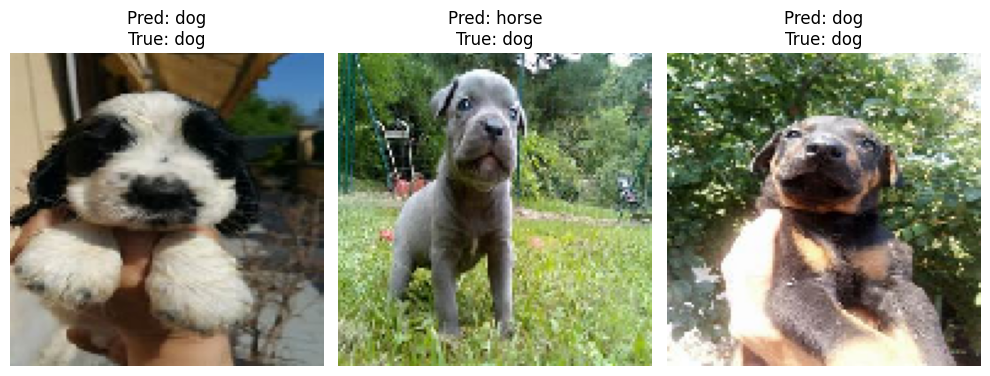

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "cane": "dog", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo","ragno": "spider"}

# Get the first batch of test data
X_test_batch, y_test_batch = next(test_dataset)

# Predict the first 3 images
predictions = cnn.predict(X_test_batch[:3])

# Convert predictions from probabilities to class indices
predicted_labels = np.argmax(predictions, axis=1)

# True labels for the first 3 images
true_labels = y_test_batch[:3]

# Class labels (mapping class indices to names)
class_names = list(test_dataset.class_indices.keys())
#class_names_english = [translate[name] for name in class_names_italian]
# Display the images, true labels, and predicted labels
plt.figure(figsize=(10, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test_batch[i])  # Show the image
    plt.axis('off')              # Hide the axis

    # print("predicted label:", class_names[predicted_labels[i]])
    predict_eng_name = translate.get(class_names[predicted_labels[i]])
    true_eng_name = translate.get(class_names[int(true_labels[i])])
    # print("predicted label:", eng_name)


    plt.title(f"Pred: {predict_eng_name}\nTrue: {true_eng_name}")

plt.tight_layout()
plt.show()